In [1]:
from collections import defaultdict
from csv import DictReader
from survey_response import SurveyResponse

def read_valid_results(path):
    valid_res = []
    with open(path, 'r') as file:
        reader = DictReader(file)
        next(reader)
        next(reader)
        for item in reader:
            if item['Status'] != 'Survey Preview' and item['Q6'] != '' and item['Screen 1'] == 'Yes' and item['Screen 2'] == '40':
                valid_res.append(item)
    return valid_res

path = '/home/daniel/GeneticBoulders/user_study/Evolving MoonBoard Routes_February 20, 2023_20.45.csv'
valid_res = read_valid_results(path)
all_responses = [SurveyResponse(res) for res in valid_res]

THRESHOLD = 0.5
reliable_responses = [r for r in all_responses if (p := r.perc_calibrated_gradeable()) and p >= THRESHOLD]
rr_dict = defaultdict(list)
for r in reliable_responses:
    rr_dict[r.max_climbed].append(r)

Num responses: 52
[0.4, 0.3, 0.4, 0.4, 0.3, 0.3, 0.2, 0.6, 0.4, 0.4, 0.3, 0.3, 0.4, 0.4, 0.3, 0.3, 0.2, 0.3, 0.3, 0.3, 0.4, 0.2, 0.2, 0.2, 0.4, 0.2, 0.3, 0.4, 0.1, 0.3, 0.3, 0.5, 0.4, 0.3, 0.4, 0.3, 0.0, 0.3, 0.2, 0.2, 0.4, 0.3, 0.2, 0.1, 0.4, 0.3, 0.5, 0.1, 0.5, 0.3, 0.5, 0.6] [0.45, 0.35, 0.25, 0.25, 0.45, 0.25, 0.3, 0.45, 0.3, 0.4, 0.45, 0.25, 0.2, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.3, 0.45, 0.2, 0.3, 0.25, 0.6, 0.25, 0.15, 0.3, 0.4, 0.1, 0.35, 0.45, 0.35, 0.3, 0.4, 0.2, 0.25, 0.4, 0.2, 0.3, 0.2, 0.4, 0.45, 0.3, 0.3, 0.05, 0.1, 0.3, 0.25, 0.3, 0.4, 0.25]
pearson r for all: r = 0.14312467376448354, p = 0.31143246635313915


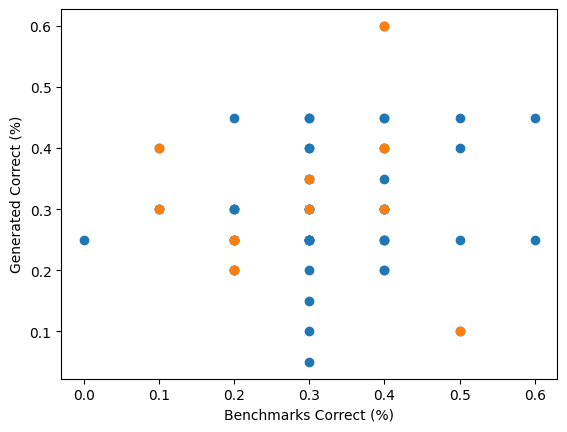

In [14]:
from matplotlib import pyplot as plt
from scipy.stats import pearsonr

responses = all_responses
advanced_responses = [r for r in all_responses if r.max_climbed > 9]

calibs = [r.perc_calibration_correct() for r in responses]
gener = [r.perc_generated_correct() for r in responses]

advanced_calibs = [r.perc_calibration_correct() for r in advanced_responses]
advanced_generated = [r.perc_generated_correct() for r in advanced_responses]

g_calibs = [r.perc_calibrated_gradeable() for r in responses]
g_generated = [r.perc_generated_gradeable() for r in responses]

print(f'Num responses: {len(responses)}')
print(calibs, gener)

plt.xlabel('Benchmarks Correct (%)')
plt.ylabel('Generated Correct (%)')
plt.scatter(calibs, gener)
plt.scatter(advanced_calibs, advanced_generated)
# plt.scatter(g_calibs, g_generated)

# g_r = pearsonr(g_calibs, g_generated)
# print(f'pearson r for gradeable: r = {g_r[0]}, p = {g_r[1]}')



r = pearsonr(calibs, gener)
print(f'pearson r for all: r = {r[0]}, p = {r[1]}')

ar = pearsonr(advanced_calibs, advanced_generated)
print(f'pearson r for advanced: r = {ar[0]}, p = {ar[1]}')


In [3]:
from statistics import mean
from image_link_mapping import IMAGE_LINKS
from survey_response import SurveyResponse
from collections import defaultdict
path = '/home/tyebkhad/GeneticBoulders/user_study/Evolving MoonBoard Routes_February 20, 2023_20.45.csv'

print(len(responses), 'valid responses')

print(len(reliable_responses), 'reliable responses')
calib_percs = sorted([(r.max_climbed, r.perc_calibrated_gradeable()) for r in reliable_responses], reverse=True)
gen_percs = sorted([(r.max_climbed, r.perc_generated_gradeable()) for r in reliable_responses], reverse=True)
print('Calibration:', calib_percs)
print('Generated:', gen_percs)
print(mean(i[1] for i in gen_percs))

# look at correlation between max grade and being accurate
# 

# print(sorted((r.max_gradeable() for r in responses), reverse=True))
# percs = [r.perc_calibrated_gradeable() for r in responses]
# print(sorted(percs, reverse=True))
# for resp in responses:
#     print(resp.perc_calibrated_gradeable())

# got_v4 = []
# for item in valid_res:
#     v4_resp = item['17_Q10']
#     if 'V4' in v4_resp or 'V5' in v4_resp:
#         got_v4.append(item)
# print(len(got_v4))
# for r in got_v4:
#     print(r)

10 valid responses
16 reliable responses
Calibration: [(10, 0.5), (10, 0.5), (10, 0.5), (9, 0.7142857142857143), (7, 0.8), (7, 0.6), (7, 0.6), (7, 0.6), (7, 0.6), (6, 0.75), (5, 1.0), (5, 0.6666666666666666), (4, 1.0), (4, 1.0), (4, 0.5), (4, 0.5)]
Generated: [(10, 0.4375), (10, 0.3125), (10, 0.125), (9, 0.5), (7, 0.6), (7, 0.3), (7, 0.2), (7, 0.1), (7, 0.1), (6, 0.125), (5, 0.8333333333333334), (5, 0.6666666666666666), (4, 0.25), (4, 0.25), (4, 0.0), (4, 0.0)]
0.3


## Recording
- 52 valid responses
### Allowing +- 1 in grade
- 16 responses with >= 50% correct calibration at or below their max climbing grade
    - these responses agreed with predicted grade 30% of the time
### Allowing +- 2 in grade
- 35 responses with >= 50% correct calib at or below max
    - these responses agreed with predicted grade about 55% of the time
### allowing +- 3
- 47 response are valid 
    - agree 71% of the time
